In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train=pd.read_csv("train_total.csv",index_col=False)
train.dropna()

,Unnamed: 0,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,...,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID,Unnamed: 22,EPRTRAnnexIMainActivityCode,EPRTRSectorCode
0,0,10,4,49,6785,3387,4137,0,0,8,...,20681,7610,9504,13648,2,32035,2469,28501,70,9
1,1,15,4,50,3413,6709,4364,0,2,11,...,23028,13061,16999,21741,1,3648,4127,28501,70,9
2,2,28,8,58,1328,1438,3347,0,1,12,...,2322,5081,8287,10933,2,43991,1580,28501,70,9
3,3,5,2,64,565,2632,2117,0,2,5,...,3284,33677,26931,34589,0,6826,1100,28501,70,9
4,4,8,8,70,6220,6874,4451,0,1,11,...,21467,36904,31175,38065,2,4681,1401,28501,70,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65623,65623,4,2,64,425,2586,2324,0,0,1,...,30819,43030,35448,42348,0,40959,884,1814,2,0
65624,65624,8,2,64,6255,7142,2987,0,2,1,...,15428,9356,7390,5359,0,12911,40,3299,2,0
65625,65625,27,8,58,5447,3814,3479,0,1,3,...,14668,53323,53506,53858,2,44480,2631,19908,50,4
65626,65626,15,4,69,3770,1665,4664,0,2,7,...,29347,15775,11849,12482,0,26725,196,14307,17,2


In [3]:
train_labels=['countryName', 'eprtrSectorName', 'EPRTRAnnexIMainActivityLabel',
       'FacilityInspireID', 'facilityName', 'City', 'targetRelease',
        'reportingYear', 'MONTH', 'DAY', 'CONTINENT',
       'max_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'max_temp',
       'avg_temp', 'min_temp', 'DAY WITH FOGS', 'REPORTER NAME', 'CITY ID']

pca_3=['countryName','EPRTRAnnexIMainActivityLabel','FacilityInspireID','City',
       'MONTH','max_wind_speed', 'avg_wind_speed', 
       'min_wind_speed','max_temp','avg_temp', 'min_temp','DAY WITH FOGS', 'REPORTER NAME']
x=train[pca_3].values
y=train['pollutant'].values#.reshape((65628,1))
x.shape

(65628, 13)

In [4]:
y.shape

(65628,)

In [5]:

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.065, random_state=0)

In [6]:
y_train.shape

(61362,)

In [7]:
x_train.shape

(61362, 13)

In [8]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [9]:
model = RandomForestClassifier(n_estimators=200, max_depth=100, random_state=0)

# Train the model using the training sets
model.fit(X_resampled,y_resampled)

#Predict Output

model.score(x_test,y_test)

0.7116736990154712

In [10]:
y_pred = model.predict(x_test)
aux=confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      1497
           1       0.93      0.89      0.91      1056
           2       0.66      0.68      0.67      1713

    accuracy                           0.71      4266
   macro avg       0.74      0.73      0.73      4266
weighted avg       0.71      0.71      0.71      4266



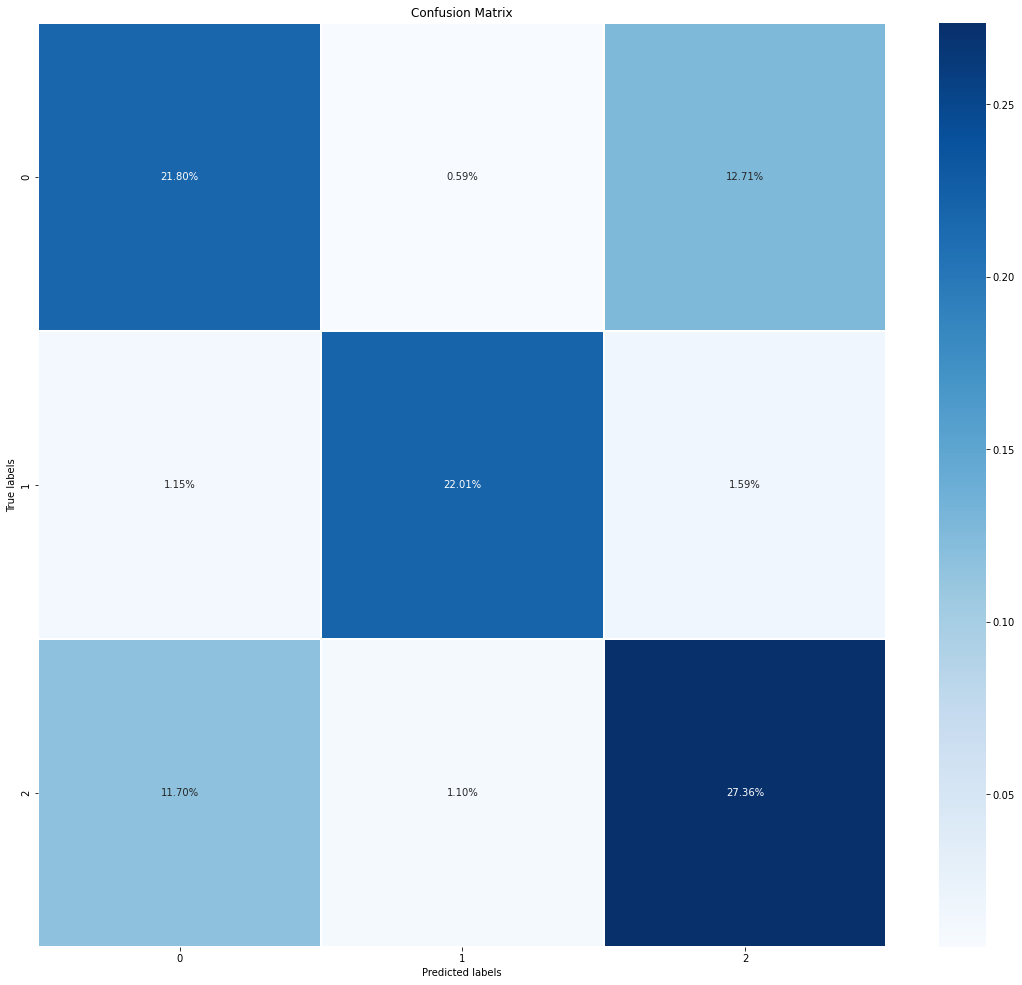

In [11]:
plt.figure(figsize = (19,17))
ax = sns.heatmap(aux/np.sum(aux), annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [12]:
test=pd.read_csv("test_x.csv",index_col=False)
le = preprocessing.LabelEncoder()
encoded_series = test[test.columns[:]].apply(le.fit_transform)

In [25]:
y_new =encoded_series[pca_3]
prediction= model.predict(y_new)
print(prediction)
submission = pd.DataFrame({"Id":test.iloc[:, 0],
                           "aux":prediction})
print(submission)
#submission.to_csv("results.csv",  index=False)

[2 2 2 ... 2 0 2]
          Id  aux
0          0    2
1          1    2
2          2    2
3          3    2
4          4    2
...      ...  ...
24475  24475    1
24476  24476    0
24477  24477    2
24478  24478    0
24479  24479    2

[24480 rows x 2 columns]


In [26]:
def calc_new_col(row):
        if row['aux'] == 1 :
            return "Carbon dioxide (CO2)"
        elif row['aux']==2 :
            return "Methane (CH4)"
        else:
            return "Nitrogen oxides (NOX)"

submission["pollutant"] = submission.apply(calc_new_col, axis=1)
submission

,Id,aux,pollutant
0,0,2,Methane (CH4)
1,1,2,Methane (CH4)
2,2,2,Methane (CH4)
3,3,2,Methane (CH4)
4,4,2,Methane (CH4)
...,...,...,...
24475,24475,1,Carbon dioxide (CO2)
24476,24476,0,Nitrogen oxides (NOX)
24477,24477,2,Methane (CH4)
24478,24478,0,Nitrogen oxides (NOX)


In [28]:
labels=['Id','pollutant']
submission=submission[labels]
submission.to_csv("predictions.csv",  index=False)

In [31]:
submission.to_json("predictions.json")